# IMDB Movie Reviews- LSTM+CNN

## Importing Libraries
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

pd.set_option('display.max_colwidth', None)

In [2]:
df = pd.read_csv("IMDB Dataset.csv", encoding='latin1')
df.head()

,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than ""Devil Wears Prada"" and more interesting than ""Superman"" a great comedy to go see with friends.",positive
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zom

In [3]:
df.sample(5)

,review,sentiment
16971,"Generally I don't like films directed by Sydney Pollack (""The Firm"" being somewhat of an exception) and I've never been a Robert Redford fan either. Still, I thought ""Three Days of the Condor"" must be good because of the number of praising comments it has received.<br /><br />Although the widescreen cinematography is quite pleasing for the eye and Max von Sydow does a nice job as the sinister professional killer, I found the whole affair tremendously disappointing. The film undeniably radiates paranoid atmosphere, but everything is ruined by the muddled plot which doesn't seem to make any sense.<br /><br />The film also contains one of the most unsatisfying endings I have ever seen which really leaves the viewer hanging in the air. And what can one say about that absurd romance between Redford and Dunaway? I'd much rather watch any of Hitchcock's films five times in succession than to sit through this piece of waste once more.",negative
14310,"Let me start by saying at the young age of 34 I was suddenly widowed. I was devastated as he was NOT sick--- he died unexpectedly basically of a coronary--- his carotids blew out-- he died behind our house. There was a lot of speculation from police, cause he fell on something and it bashed his head in. I was a suspect for murder until the autopsy came back. <br /><br />My children were as traumatized as I was, so in love with a good father figure as he. I had three small children, no education, no financial support. I took it very, very hard. <br /><br />Within two years my in-laws attacked me verbally, physically, emotionally and spiritually demanding I grieve not in front of the children, and put on masks and showed people what they wanted to see, not show them my pain during holidays... Nobody stood up for me and my choice to sit out one holiday, except of course, the grief therapist I was seeing that had advised me to follow my heart and soul. My in-laws didn't get it! It changed FOREVER my relationship with them, and I have never been back for a holiday. This is only one example of how my grief was disrespected! My own (new) husband has seen me fall apart talking about the trauma when I shared from my soul. I collapse, can not breathe, hyperventilate, and generally am defunct for a few days if I even try to convey the hidden pain. <br /><br />Now about this movie...<br /><br />Today, my soul was stirred, my heart broken. My fears and pain re-surfaced from the real demons this movie presents; how one grieves compared to how others expect us too and the demons within. Adam Sandler portrayed perfectly the horrendous agony you face, overcome and most of all, work through on your own time! This movie dredged up all the pain that I have tried over the years to deal with. You see, when something harms your soul so profoundly, so deep that utterances are all that come from your mouth in moments of thinking, you can not deal with it without wishing you were dead and walking through life, in a dead state. <br /><br />The bible has a scripture, Romans 8:26 that I have clung to, that when my mouth and soul know not what to pray for, that God's Holy Spirit carries that agony to the feet of God-- I need not speak. Sandler portrayed that to perfection! <br /><br />There is a scene where he has been hauled into a court hearing, for mental health commitment purposes, and he goes back in to face his in-laws--- (familiar to me)--- and he tells them the stunning truths that he has been possessed by, per Se, that he can't get over. It's a profoundly strong, and mighty performance. I started bawling and had a hard time after wards getting up to walk out from the theater feeling my legs too weak to do so. My son was with me and saw it first hand, my precise motions while trying to hold it all together; a lesson for him, my youngest who barely remembers his daddy. It's been 13 years for me but this movie brought me back to the moment of losing my in-laws forever when they dema

In [4]:
df.shape

(50000, 2)

In [5]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,"Loved today's show!!! It was a variety and not solely cooking (which would have been great too). Very stimulating and captivating, always keeping the viewer peeking around the corner to see what was coming up next. She is as down to earth and as personable as you get, like one of us which made the show all the more enjoyable. Special guests, who are friends as well made for a nice surprise too. Loved the 'first' theme and that the audience was invited to play along too. I must admit I was shocked to see her come in under her time limits on a few things, but she did it and by golly I'll be writing those recipes down. Saving time in the kitchen means more time with family. Those who haven't tuned in yet, find out what channel and the time, I assure you that you won't be disappointed.",positive
freq,5,25000


In [6]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [7]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,"Loved today's show!!! It was a variety and not solely cooking (which would have been great too). Very stimulating and captivating, always keeping the viewer peeking around the corner to see what was coming up next. She is as down to earth and as personable as you get, like one of us which made the show all the more enjoyable. Special guests, who are friends as well made for a nice surprise too. Loved the 'first' theme and that the audience was invited to play along too. I must admit I was shocked to see her come in under her time limits on a few things, but she did it and by golly I'll be writing those recipes down. Saving time in the kitchen means more time with family. Those who haven't tuned in yet, find out what channel and the time, I assure you that you won't be disappointed.",positive
freq,5,25000


Checking for duplicates

In [8]:
print(f"Number of Duplicates in the Data: {df.duplicated().sum()}")
print(f"Number of Nulls in the Data: \n {df.isnull().sum()}")

Number of Duplicates in the Data: 418
Number of Nulls in the Data: 
 review       0
sentiment    0
dtype: int64


## Preprocessing
---

In [9]:
X = df['review']
y = df['sentiment']

Label Encoding the output labels


In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [11]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [12]:
le.classes_ # [0, 1]

array(['negative', 'positive'], dtype=object)

## Train Test Split
---

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [14]:
y_train = y_train.astype('float32').reshape((-1, 1))
y_test = y_test.astype('float32').reshape((-1, 1))

In [15]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(40000,) (10000,)
(40000, 1) (10000, 1)


## Model Building
---

In [16]:
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras.layers import Conv1D, Flatten, MaxPooling1D, Dense, LSTM, Embedding, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2

# max_features = 30000 # Number of words in our vocabulary
max_len = 512 # length of the output vectors

In [17]:
vectorize_layer = TextVectorization(output_mode = 'int', output_sequence_length = max_len)

Creating Vocabulary

In [18]:
%%time
vectorize_layer.adapt(X_train)

CPU times: user 7.31 s, sys: 294 ms, total: 7.61 s
Wall time: 8.58 s


In [19]:
vocab_len = len(vectorize_layer.get_vocabulary())
vocab_len

160494

In [20]:
model = Sequential()
model.add(Input(shape=(1,), dtype = tf.string))
model.add(vectorize_layer)
model.add(Embedding(input_dim = vocab_len, output_dim = 256, input_length= max_len))
model.add(Conv1D(32, 5, strides = 1,activation= 'relu', padding = 'same', kernel_regularizer = l2(0.0001)))
model.add(Conv1D(16, 5, strides = 1,activation= 'relu', padding = 'same', kernel_regularizer = l2(0.0001)))
model.add(MaxPooling1D(4, 1, padding = 'same'))
model.add(tf.keras.layers.Bidirectional(LSTM(64, kernel_regularizer = l2(0.0001))))
model.add(Dense(32, activation = 'relu', kernel_regularizer = l2(0.0001)))
model.add(Dense(16, activation = 'relu', kernel_regularizer = l2(0.0001)))
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))

In [21]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)

In [22]:
model.compile(optimizer= optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 512)              0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 512, 256)          41086464  
                                                                 
 conv1d (Conv1D)             (None, 512, 32)           40992     
                                                                 
 conv1d_1 (Conv1D)           (None, 512, 16)           2576      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 512, 16)          0         
 )                                                               
                                                                 
 bidirectional (Bidirectiona  (None, 128)              4

In [23]:
%%time
hist = model.fit(X_train, y_train,
          epochs= 6, validation_data = (X_test, y_test))

Epoch 1/6
1250/1250 [==============================] - 226s 167ms/step - loss: 0.5119 - accuracy: 0.7646 - val_loss: 0.3827 - val_accuracy: 0.8600
Epoch 2/6
1250/1250 [==============================] - 101s 81ms/step - loss: 0.2743 - accuracy: 0.9003 - val_loss: 0.3356 - val_accuracy: 0.8720
Epoch 3/6
1250/1250 [==============================] - 86s 69ms/step - loss: 0.1686 - accuracy: 0.9444 - val_loss: 0.2896 - val_accuracy: 0.8955
Epoch 4/6
1250/1250 [==============================] - 77s 62ms/step - loss: 0.1021 - accuracy: 0.9698 - val_loss: 0.3465 - val_accuracy: 0.8947
Epoch 5/6
1250/1250 [==============================] - 74s 59ms/step - loss: 0.0645 - accuracy: 0.9837 - val_loss: 0.3353 - val_accuracy: 0.8924
Epoch 6/6
1250/1250 [==============================] - 75s 60ms/step - loss: 0.0503 - accuracy: 0.9876 - val_loss: 0.4586 - val_accuracy: 0.8822
CPU times: user 9min 25s, sys: 14.4 s, total: 9min 39s
Wall time: 11min 25s


## Model Evaluation
---

Plotting Model Accuracy Performance

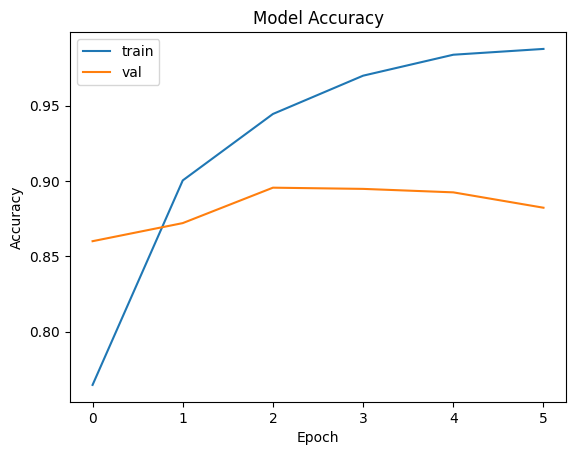

In [24]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val'])
plt.show()

Plotting Model Loss Performance

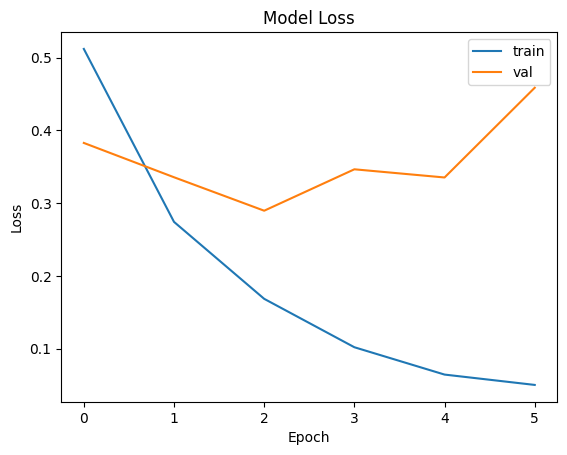

In [25]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'])
plt.show()

## Prediction
---

In [26]:
pred = model.predict(['''So, I'm wondering while watching this film, did the producers of this movie get to save money on Sandra Bullock's wardrobe by dragging out her "before" clothes from Miss Congeniality? Did Ms. Bullock also get to sleepwalk through the role by channeling the "before" Gracie Hart? As many reviewers have noted before, the film is very formulaic. Add to that the deja vu viewer experiences with the character of Cassie Maywether as a somewhat darker Gracie Hart with more back story and it rapidly become a snooze fest.<br /><br />The two bad boy serial killers have been done before (and better) in other films. As has the "good guy partner trying to protect his partner despite the evidence" character been seen before. In fact none of the characters in the film ever get beyond two dimensions or try to be anything but trite stereotypes.<br /><br />One last peeve - using the term serial killer is false advertising. Murdering one person - even if it's a premeditated murder - does not make you a serial killer. You may have the potential to become a serial killer but you are not a serial killer or even a spree killer.''',])

1/1 [==============================] - 1s 851ms/step


In [27]:
pred > 0.5

array([[False]])

In [28]:
pred2 = model.predict(['''Petter Mattei's "Love in the Time of Money" is a visually stunning film to watch. Mr. Mattei offers us a vivid portrait about human relations. This is a movie that seems to be telling us what money, power and success do to people in the different situations we encounter. <br /><br />This being a variation on the Arthur Schnitzler's play about the same theme, the director transfers the action to the present time New York where all these different characters meet and connect. Each one is connected in one way, or another to the next person, but no one seems to know the previous point of contact. Stylishly, the film has a sophisticated luxurious look. We are taken to see how these people live and the world they live in their own habitat.<br /><br />The only thing one gets out of all these souls in the picture is the different stages of loneliness each one inhabits. A big city is not exactly the best place in which human relations find sincere fulfillment, as one discerns is the case with most of the people we encounter.<br /><br />The acting is good under Mr. Mattei's direction. Steve Buscemi, Rosario Dawson, Carol Kane, Michael Imperioli, Adrian Grenier, and the rest of the talented cast, make these characters come alive.<br /><br />We wish Mr. Mattei good luck and await anxiously for his next work.'''])

1/1 [==============================] - 0s 73ms/step


In [29]:
pred2 > 0.5

array([[ True]])

In [30]:
pred2

array([[0.9988304]], dtype=float32)

Defining a function for inference, in this function we will assume a negative sentiment if prediction not greater than 0.5 and positive sentiment if prediction is greater than 0.5

In [31]:
def predict_sentiment(text, model):
    text = [text]
    pred = model.predict(text)
    print(pred)
    if pred > 0.5:
        return "Positive"
    else:
        return "Negative"

In [32]:
pst_txt = '''One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.'''
predict_sentiment(pst_txt, model)

1/1 [==============================] - 0s 49ms/step
[[0.9886636]]


'Positive'

In [33]:
ngt_txt ='''Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them.'''
predict_sentiment(ngt_txt, model)

1/1 [==============================] - 0s 43ms/step
[[0.00027591]]


'Negative'

In [34]:
ngt_txt2 = '''It's become extremely difficult to find a good horror movie anymore, thought this movie was a good thriller.<br /><br />Could have had better production values but what kept me going was the suspense and the twists. I had real reservations before seeing this movie (because of the cover). I was afraid that it would be excessively bloody and gory. I was wrong.<br /><br />Although there is a lot of scary parts, there is a lot of suspense and drama too.<br /><br />The acting in Dead Line was better than what you would expect from a micro budget horror flick. The characters were believable<br /><br />The movie is really thrilling and quite scary at moments so it makes you grab your seat until the ending credits roll<br /><br />Because of its production values (the sound is not very good for example) 8/10.'''
predict_sentiment(ngt_txt2, model)

1/1 [==============================] - 0s 44ms/step
[[0.99728596]]


'Positive'

In [35]:
text3 = '''This movie is incredible. If you have the chance, watch it. Although, a warning, you'll cry your eyes out. I do, every time I see it, and I own it and have watched it many times. The performances are outstanding. It deals with darkness and pain and loss, but there is hope. This movie made me look at the world differently: vicarious experience, according to my English teacher. Also, if you've seen it, note the interesting use of shadows and light. Home room is a phenomenal movie, and I rate it 10/10 - for real - because of the excellent acting, amazing plot, and heart-wrenching dialogue. Very tense, very moving. Doesn't give all the answers, but makes many good points about humankind'''
predict_sentiment(text3, model)

1/1 [==============================] - 0s 45ms/step
[[0.99951947]]


'Positive'

## Saving the model
---

In [36]:
model.save('imdb_sentiment_classifier.tf')